In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from electre_tri import *

In [21]:
metrics = {}
metrics['accuracy'] = {}
metrics['precision'] = {}
metrics['recall'] = {}
labels = ['a','b','c','d','e']

In [22]:
# reading the other group's results
df1 = pd.read_csv("Electre-Tri_output.csv")
df1 = df1.rename(columns={'Nutrition_grades': 'nutriscore_grade'})

In [52]:
# executing our algorithm on the other group's data
columns = ['Energy', 'Saturated_fatty_acids', 'Sugars', 'Fiber',
           'Proteins', 'Salt', 'Fruit_vegetable']
weights = {
            "Energy":1, "Sugars":1, "Saturated_fatty_acids":1, "Salt": 1, 
            "Proteins":2, "Fiber": 2, "Fruit_vegetable":2}
weights_optim = {
            "Energy":1.25, "Sugars":1.25, "Saturated_fatty_acids":1.25, "Salt": 1.25, 
            "Proteins":1, "Fiber": 1, "Fruit_vegetable":1}

for lmd in [0.5, 0.6, 0.7]:
    df1 = PessimisticmajoritySorting(df1, lmd, weights=weights_optim, columns=columns)
    df1 = OptimisticmajoritySorting(df1, lmd, weights=weights_optim, columns=columns)

### Calculating and Plotting Precision, Accuracy and Recall

In [53]:
isa_optim = [f'weight_1_threshold_{x}_Optimistic' for x in ['0.5', '0.6', '0.7']]
isa_pessim = [f'weight_1_threshold_{x}_Pessimistic' for x in ['0.5', '0.6', '0.7']]
sayo_optim = [f'optim_electre_lmd={x}' for x in ['0.5', '0.6', '0.7']]
sayo_pessim = [f'pessim_electre_lmd={x}' for x in ['0.5', '0.6', '0.7']]

In [54]:
y_true = 'nutriscore_grade'
ys_pred = list(isa_optim)
ys_pred.extend(isa_pessim)
ys_pred.extend(sayo_optim)
ys_pred.extend(sayo_pessim)

for y_pred in ys_pred:
    metrics['accuracy'][y_pred] = round(accuracy_score(df1[y_true], df1[y_pred]),3)
    metrics['precision'][y_pred] = round(precision_score(df1[y_true], df1[y_pred], average='macro'),3)
    metrics['recall'][y_pred] = round(recall_score(df1[y_true], df1[y_pred], average='macro'),3)

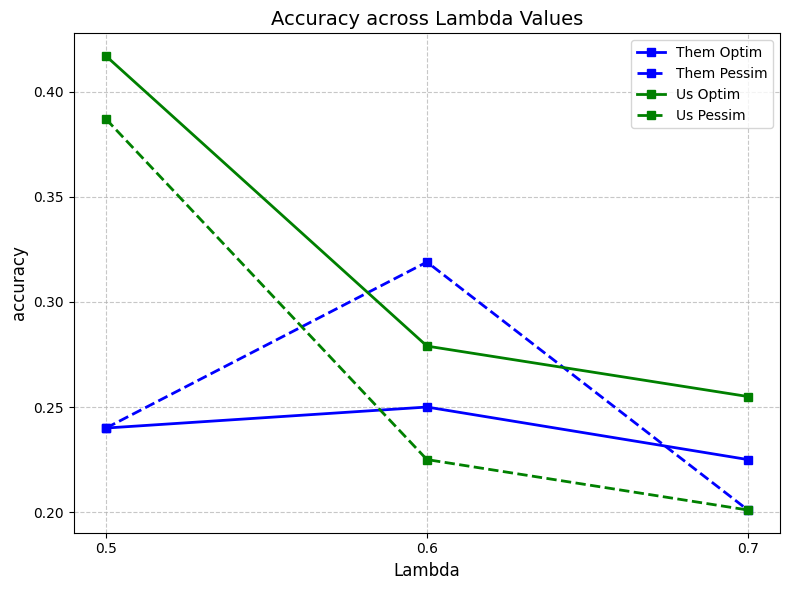

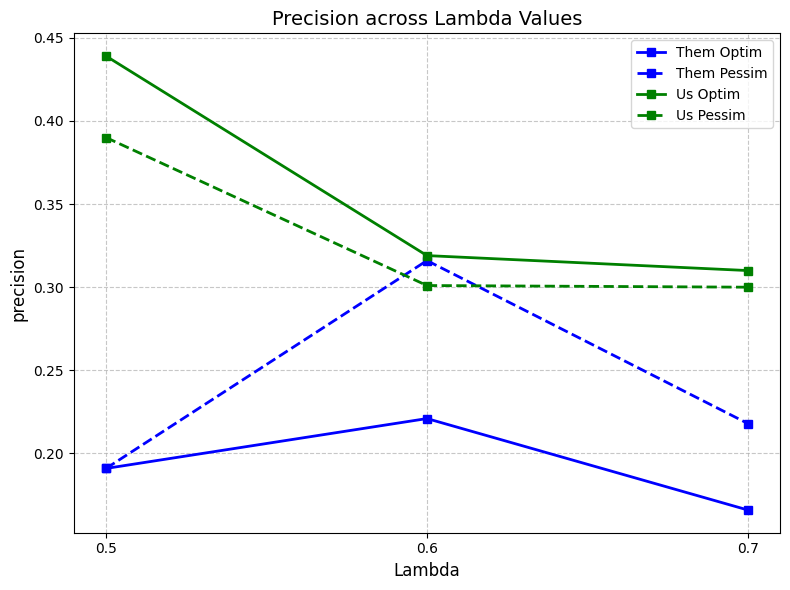

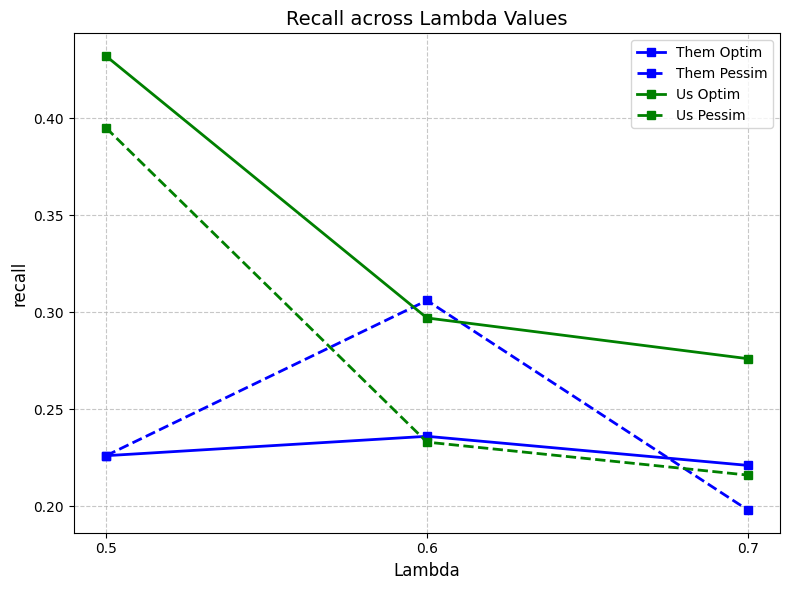

In [55]:
import matplotlib.pyplot as plt

# Extract x and y values for plotting
for metric in ['accuracy', 'precision', 'recall']:
    x = [float(i) for i in ['0.5', '0.6', '0.7']]
    isa_optim_y = [metrics[metric][y] for y in isa_optim]
    isa_pessim_y = [metrics[metric][y] for y in isa_pessim]
    sayo_optim_y = [metrics[metric][y] for y in sayo_optim]
    sayo_pessim_y = [metrics[metric][y] for y in sayo_pessim]

    # Plot the data
    plt.figure(figsize=(8, 6))

    plt.plot(x, isa_optim_y, label='Them Optim', marker='s', linestyle='-', color='blue', linewidth=2)
    plt.plot(x, isa_pessim_y, label='Them Pessim', marker='s', linestyle='--', color='blue', linewidth=2)
    plt.plot(x, sayo_optim_y, label='Us Optim', marker='s', linestyle='-', color='green', linewidth=2)
    plt.plot(x, sayo_pessim_y, label='Us Pessim', marker='s', linestyle='--', color='green', linewidth=2)

    # Add labels and legend
    plt.xlabel('Lambda', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.title(f'{metric.capitalize()} across Lambda Values', fontsize=14)
    plt.legend(loc='upper right', fontsize=10)

    # Customize grid and ticks
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(x, labels=[str(val) for val in x])
    plt.yticks(fontsize=10)

    # Add a horizontal line for reference (optional)
    # plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

    # Customize plot appearance
    plt.tight_layout()

    # Save the plot as an image (optional)
    plt.savefig(f'{metric}_2groups_newWeights.png')

    # Show the plot
    plt.show()

In [60]:
isa_pessim

['weight_1_threshold_0.5_Pessimistic',
 'weight_1_threshold_0.6_Pessimistic',
 'weight_1_threshold_0.7_Pessimistic']

### Plotting the Confusion Matrices

<Figure size 1000x800 with 0 Axes>

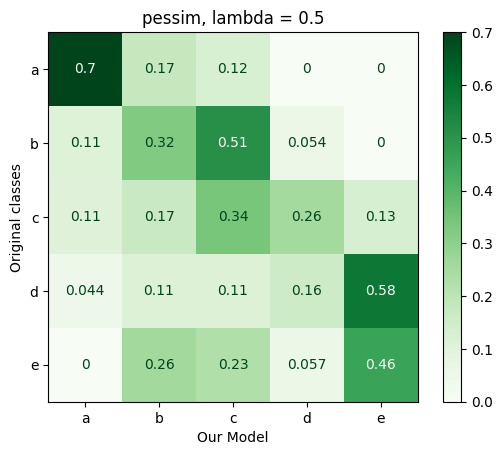

In [68]:
y_true = 'nutriscore_grade'
y_pred = 'pessim_electre_lmd=0.5'
labels = ['a','b','c','d','e']
plt.figure(figsize = (10,8))
cm = confusion_matrix(df1[y_true], df1[y_pred], labels=labels, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Greens')
# cm = rounding(cm)
# sns.heatmap(cm, annot = True, xticklabels = labels, yticklabels = labels, cmap = 'Greens', fmt='g')
plt.title(y_pred.split("_")[0]+', lambda = '+y_pred.split('=')[1])
plt.xlabel("Our Model")
plt.ylabel('Original classes')
plt.savefig('Pessimistic0.5_our_cm.png')

<Figure size 1000x800 with 0 Axes>

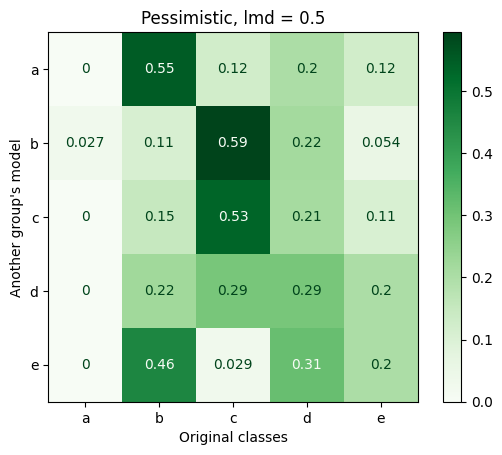

In [70]:
y_true = 'nutriscore_grade'
y_pred = 'weight_1_threshold_0.5_Pessimistic'
labels = ['a','b','c','d','e']
plt.figure(figsize = (10,8))
cm = confusion_matrix(df1[y_true], df1[y_pred], labels=labels, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Greens')
# cm = rounding(cm)
# sns.heatmap(cm, annot = True, xticklabels = labels, yticklabels = labels, cmap = 'Greens', fmt='g')
plt.title("Pessimistic, lmd = 0.5")
plt.xlabel("Original classes")
plt.ylabel("Another group's model")
plt.savefig('Pessimistic0.5_their_cm.png')